## Problem Statement
#### Unicorn Ventures want to make an investment in a new form of transportation - JetRail. JetRail uses Jet Propulsion technology to run rails and move people at a high speed. The investment only makes sense if JetRail can get more than 1M users in a span of 18 months. Forecast the traffic on jetRails for the next 7 months to help Unicorn Ventures make a decision.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from datetime import datetime

### Hypotheses - 

1. There will be an increase in traffic as years pass by.
2. The traffic will be high from May to October
3. Traffic will be more on weekdays than on weekends/holidays
4. Traffic will be higher during peak hours

In [2]:
test = pd.read_csv('/Users/pranaymitra/Downloads/AV TS Forecasting/Test_0qrQsBZ.csv')
train = pd.read_csv('/Users/pranaymitra/Downloads/AV TS Forecasting/Train_SU63ISt.csv')

In [3]:
#Creating copies to keep original dataset intact
test_original = test.copy()
train_original = train.copy()

### Understanding the data

In [4]:
print('The columns in test dataset are :',test.columns)
print('\nThe columns in train dataset are :',train.columns)

The columns in test dataset are : Index(['ID', 'Datetime'], dtype='object')

The columns in train dataset are : Index(['ID', 'Datetime', 'Count'], dtype='object')


In [5]:
test.shape, train.shape

((5112, 2), (18288, 3))

In [6]:
#1. ID is unique number given to each observation point
#2. Datetime is date and time of each observation
test.head()

,ID,Datetime
0,18288,26/09/14 0:00
1,18289,26/09/14 1:00
2,18290,26/09/14 2:00
3,18291,26/09/14 3:00
4,18292,26/09/14 4:00


In [7]:
#3. Count corresponds to count of passengers at that Datetime
train.head()

,ID,Datetime,Count
0,0,25/08/12 0:00,8
1,1,25/08/12 1:00,2
2,2,25/08/12 2:00,6
3,3,25/08/12 3:00,2
4,4,25/08/12 4:00,2


In [8]:
print('The data types of columns of test dataset are :', test.dtypes)
print('\nThe data types of columns of train dataset are :', train.dtypes)

The data types of columns of test dataset are : ID           int64
Datetime    object
dtype: object

The data types of columns of train dataset are : ID           int64
Datetime    object
Count        int64
dtype: object


### Exploration and Preprocessing 

In [9]:
# Feature Extraction - Datetime is of object type, so, we need to convert it to datetime type first

test['Datetime'] = pd.to_datetime(test.Datetime,format ='%d/%m/%y %H:%M')
train['Datetime'] = pd.to_datetime(train.Datetime,format ='%d/%m/%y %H:%M')
test_original['Datetime'] = pd.to_datetime(test.Datetime,format ='%d/%m/%y %H:%M')
train_original['Datetime'] = pd.to_datetime(train.Datetime,format ='%d/%m/%y %H:%M')

In [10]:
# Extracting day, month, year and hour from Datetime

for i in (test, train, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [11]:
# Extracting day of the week and assigning them values for identification 
train['day of the week'] = train.Datetime.dt.dayofweek
temp = train['Datetime']
# Here 0 = Monday.....5 = Saturday, 6 = Sunday

In [12]:
# Assigning 0 for Weekday and 1 for Weekend
def applyer(row):
    if row.dayofweek == 6 or row.dayofweek == 5:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)    
train['Weekend'] = temp2

In [13]:
temp2

0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, Length: 18288, dtype: int64

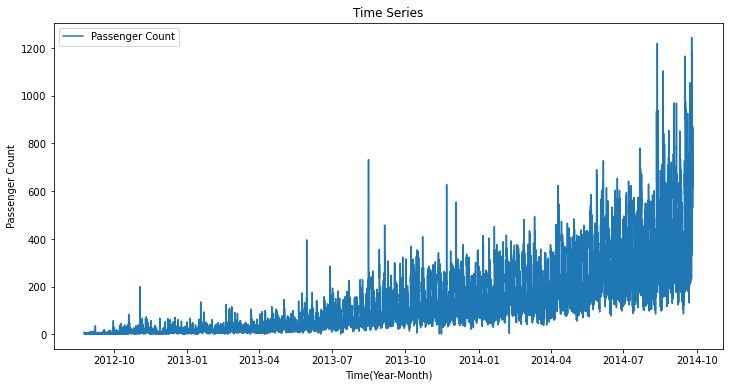

In [14]:
#Looking at time series

train.index = train['Datetime']
train.drop('ID',axis=1)
plt.figure(figsize=(12,6))
plt.plot(train['Count'],label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(Year-Month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

We infer that there is an increasing trend as the passenger count is increasing the the years pass by. It is also seen that at certain points there are peaks or sudden increases, that may be due to certain events causing the traffic to be high.

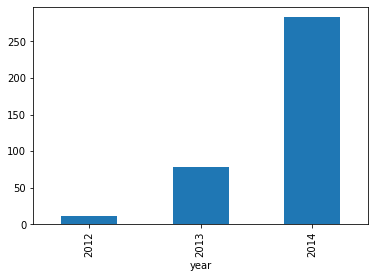

In [15]:
#Yearly passenger count
train.groupby('year')['Count'].mean().plot.bar()
plt.show()

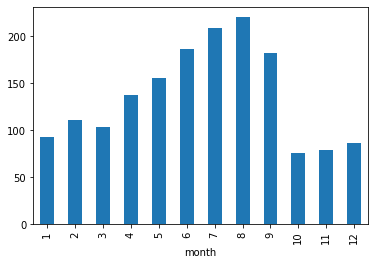

In [16]:
#Monthly passenger count
train.groupby('month')['Count'].mean().plot.bar()
plt.show()

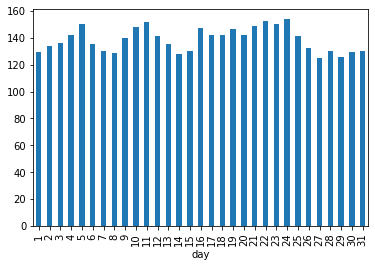

In [17]:
#Daily passenger count
train.groupby('day')['Count'].mean().plot.bar()
plt.show()

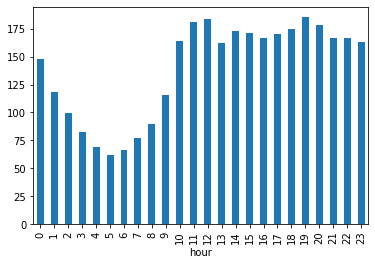

In [18]:
#Hourly Passenger count
train.groupby('hour')['Count'].mean().plot.bar()
plt.show()

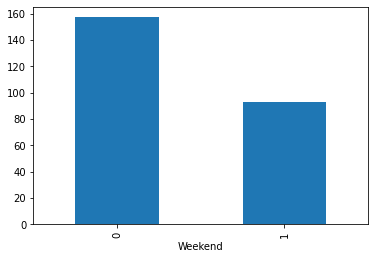

In [19]:
#Passenger count on weekdays and weekends
train.groupby('Weekend')['Count'].mean().plot.bar()
plt.show()

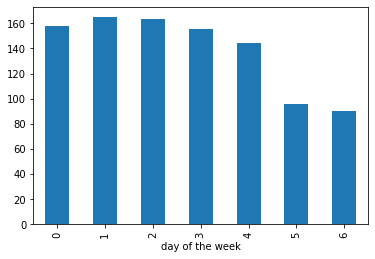

In [20]:
train.groupby('day of the week')['Count'].mean().plot.bar()
plt.show()

In [21]:
#Dropping ID as its not related to count
train = train.drop('ID',axis=1)

In [22]:
train.timestamp = pd.to_datetime(train.Datetime, format = '%d/%m/%y %H:%M')
train.index = train.timestamp

<ipython-input-22-aab2be170295>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.timestamp = pd.to_datetime(train.Datetime, format = '%d/%m/%y %H:%M')


In [23]:
#Removing Noise by aggregation

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

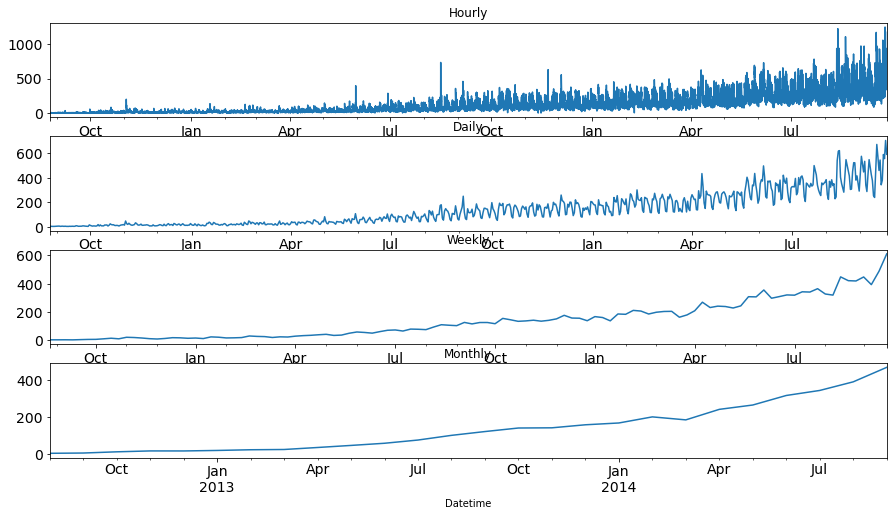

In [24]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax = axs[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax = axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax = axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax = axs[3])


plt.show()

In [25]:
#Converting to daily mean
#for test set

test.timestamp = pd.to_datetime(test.Datetime,format ='%d/%m/%y %H:%M')
test.index = test.timestamp

test = test.resample('D').mean()

<ipython-input-25-9b32fe665528>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.timestamp = pd.to_datetime(test.Datetime,format ='%d/%m/%y %H:%M')


In [26]:
#for train set
train.timestamp = pd.to_datetime(train.Datetime,format ='%d/%m/%y %H:%M')
train.index = train.timestamp

train = train.resample('D').mean()

### Dividing data into training and validation set

For this we take the last 3 months of data as the validation set as it will have the most trend and the data before that as the training set. That is, here we perform a time-based split.

In [27]:
Train = train.loc['2012-08-25' : '2014-06-24']
Valid = train.loc['2014-06-25' : '2014-09-25']

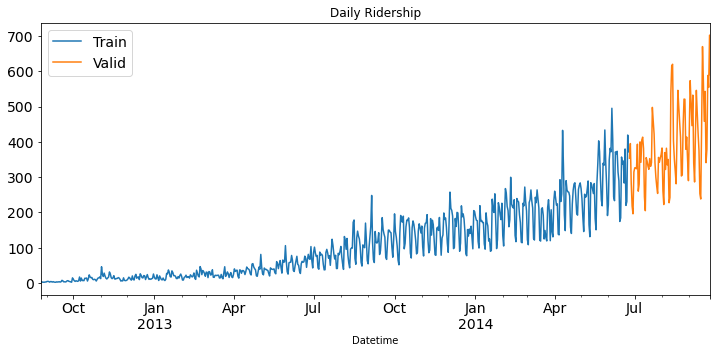

In [28]:
#Visualising the Split
Train.Count.plot(figsize=(12,5),title='Daily Ridership',fontsize=14,label='Train')
Valid.Count.plot(figsize=(12,5),title='Daily Ridership',fontsize=14,label='Valid')
plt.legend(loc='best',fontsize=14)

plt.show()


Dickey-Fuller Test

Hypotheses

Ho : The series is not stationary 

H1 : The series is stationary

Test Statistic < Critical Value, We reject the null hypotheses.

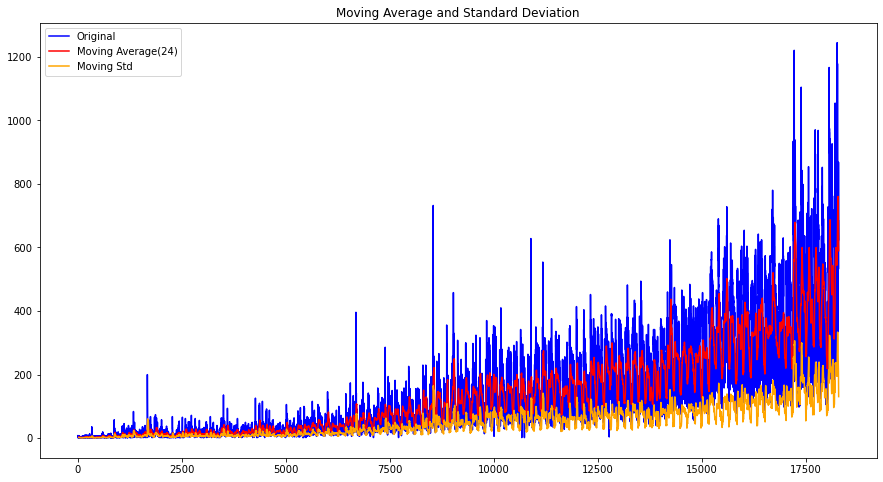

The results of Dickey-Fuller Test are : 
Test Statistic                 -4.456561
p-value                         0.000235
#Lags Used                     45.000000
No. of Observations Used    18242.000000
Critical Value (1%)            -3.430709
Critical Value (5%)            -2.861698
Critical Value (10%)           -2.566854
dtype: float64


In [29]:
#Check Stationarity
#Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
    #Moving/rolling average
    ma = ts.rolling(24).mean() #24hrs in a day
    mstd = ts.rolling(24).std()
    
    #plot rolling/moving statistics
    orig = plt.plot(ts,color = 'blue',label = 'Original')
    mean = plt.plot(ma, color = 'red',label = 'Moving Average(24)')
    std = plt.plot(mstd,color = 'orange',label = 'Moving Std')
    plt.legend(loc='best')
    plt.title('Moving Average and Standard Deviation')
    plt.show(block= False)
    
    #Dickey-Fuller test
    print('The results of Dickey-Fuller Test are : ')
    dftest = adfuller(ts, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index= ['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8
test_stationarity(train_original.Count)

We see a rising trend, so we will try to make the series more stationary

### Removing Trend

1. Trend exists when there is a long term increase or decrease in the data. It does not have to linear.

2. Here we see an increasingn trend so we can penalise the larger values more than the smaller ones. For example - by using log transformation.

3. We will take moving/rolling average here with winddow size of 24, as there are 24 hrs in a day.



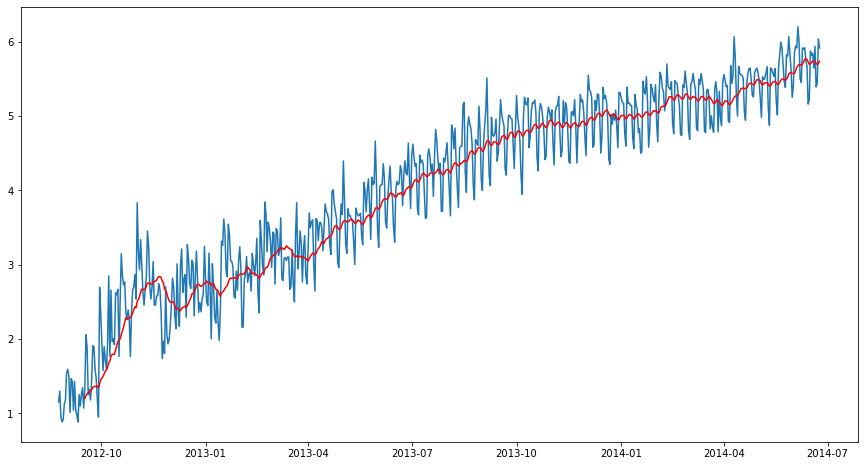

In [30]:
train_log = np.log(Train['Count'])
valid_log = np.log(Valid['Count'])

moving_avg = train_log.rolling(24).mean()

plt.figure(figsize=(15,8))
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

We will try to remove this increasing trend and make the series stationary

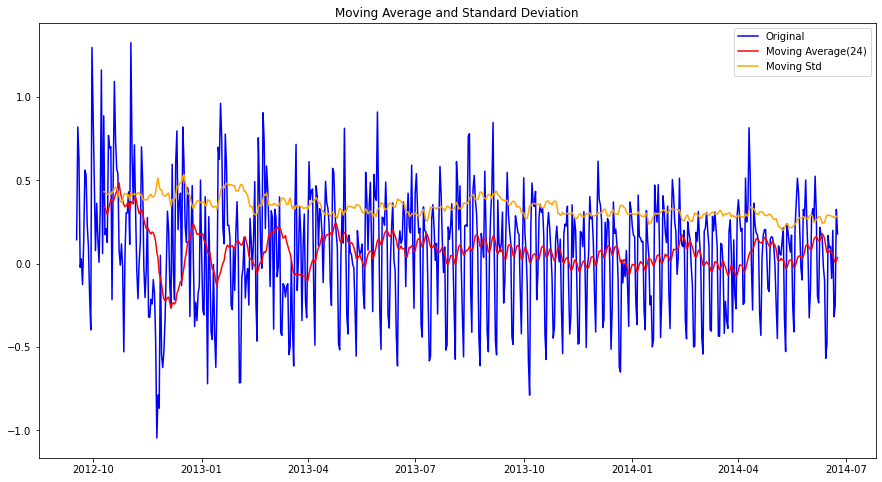

The results of Dickey-Fuller Test are : 
Test Statistic             -5.861646e+00
p-value                     3.399422e-07
#Lags Used                  2.000000e+01
No. of Observations Used    6.250000e+02
Critical Value (1%)        -3.440856e+00
Critical Value (5%)        -2.866175e+00
Critical Value (10%)       -2.569239e+00
dtype: float64


In [31]:
trainlog_movingavg_diff = train_log - moving_avg

#lets drop null values whose rolling mean was not used

trainlog_movingavg_diff.dropna(inplace = True)

#Testing stationarity

test_stationarity(trainlog_movingavg_diff)

It is observed that the Test Statistic is very small compared to the critical values(s), hence, the trend is almost removed.

Now, we try to make the mean constant. We do this by using differencing.

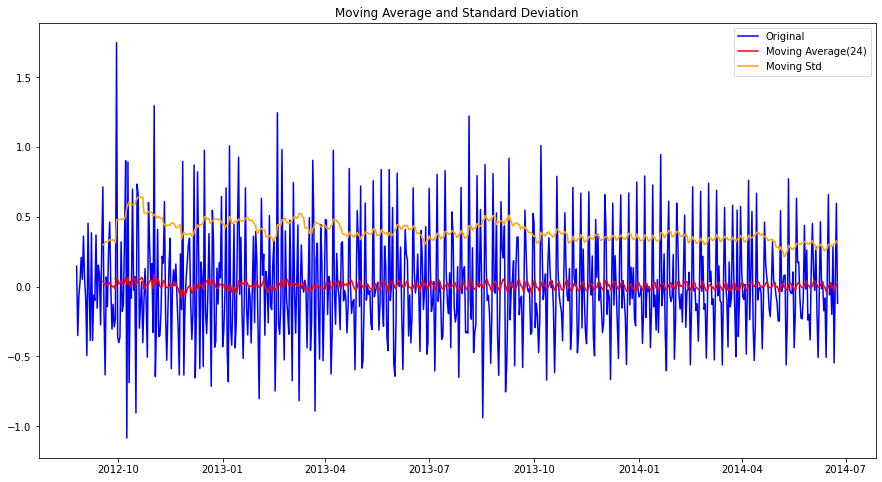

The results of Dickey-Fuller Test are : 
Test Statistic             -8.237568e+00
p-value                     5.834049e-13
#Lags Used                  1.900000e+01
No. of Observations Used    6.480000e+02
Critical Value (1%)        -3.440482e+00
Critical Value (5%)        -2.866011e+00
Critical Value (10%)       -2.569151e+00
dtype: float64


In [32]:
trainlog_diff = train_log - train_log.shift(1)
test_stationarity(trainlog_diff.dropna())

### Removing Seasonality

1. Seasonality; periodic fluctuations. When a series is influenced by seasonal factors like quarter of year, a month, a week.

2. Seasonality has a fixed/known period.

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-33-2db85ae2e32a>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(pd.DataFrame(train_log).Count.values, freq = 24)


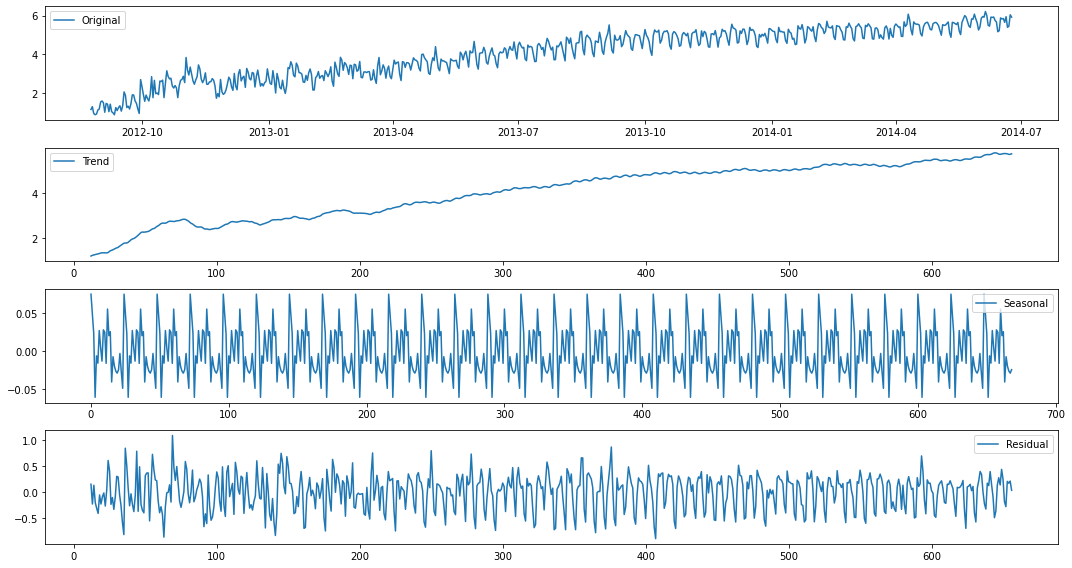

In [34]:
plt.subplot(411)
plt.plot(train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Stationarity of Residuals

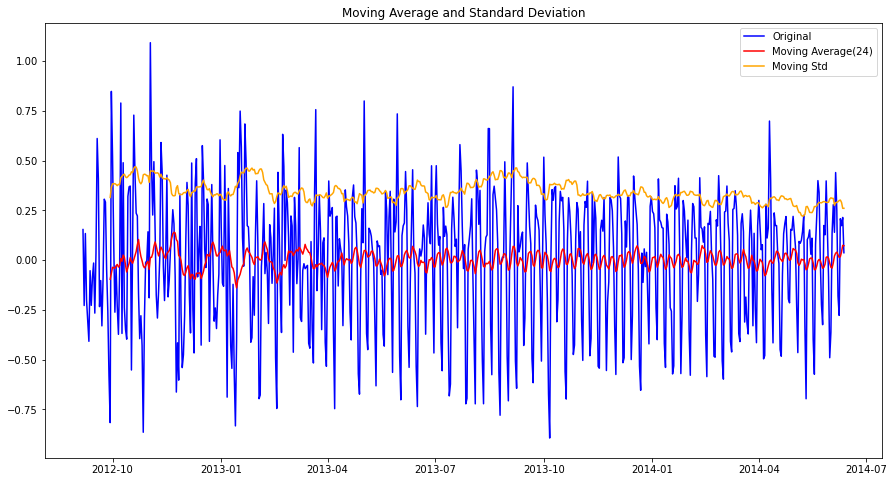

The results of Dickey-Fuller Test are : 
Test Statistic             -7.822096e+00
p-value                     6.628321e-12
#Lags Used                  2.000000e+01
No. of Observations Used    6.240000e+02
Critical Value (1%)        -3.440873e+00
Critical Value (5%)        -2.866183e+00
Critical Value (10%)       -2.569243e+00
dtype: float64


In [35]:
trainlog_decompose = pd.DataFrame(residual)
trainlog_decompose['Date'] = train_log.index
trainlog_decompose.set_index('Date',inplace = True)
trainlog_decompose.dropna(inplace=True)

test_stationarity(trainlog_decompose[0])

Residuals are Stationary

## Forecasting usign ARIMA

#### Finding optimal values of p,d,q parameters

ACF - Measure of correlation between the time series and a lagged version of itself

PACF - Measure of correlation between the time series and a lagged version of itself but after eliminating the variations already explained by intervening comparisons.

In [36]:
#ACF and PACF
#trainlog_diff as its the difference between time series and its lagged version

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(trainlog_diff.dropna(), nlags=25)
lag_pacf = pacf(trainlog_diff.dropna(), nlags=25, method= 'ols')

/Users/pranaymitra/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


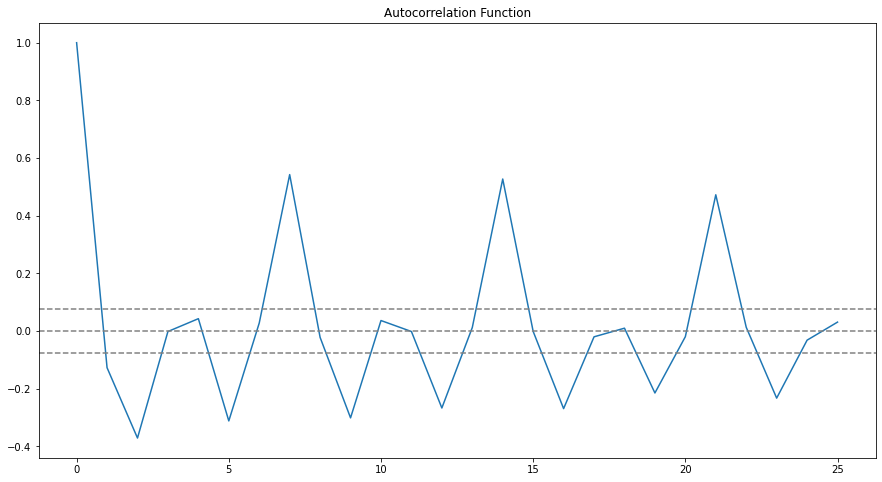

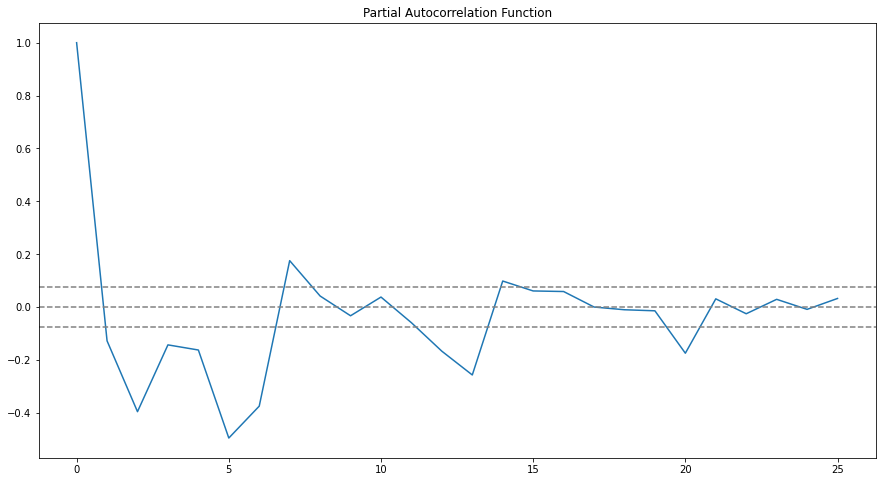

In [37]:
#Plot ACF
plt.plot(lag_acf)
plt.axhline(0, linestyle='--', color='grey')
plt.axhline(-1.96/np.sqrt(len(trainlog_diff.dropna())), linestyle='--', color = 'grey')
plt.axhline(1.96/np.sqrt(len(trainlog_diff.dropna())), linestyle='--', color = 'grey')
plt.title('Autocorrelation Function')
plt.show()


#Plot PACF

plt.plot(lag_pacf)
plt.axhline(0, linestyle='--', color='grey')
plt.axhline(-1.96/np.sqrt(len(trainlog_diff.dropna())), linestyle='--', color = 'grey')
plt.axhline(1.96/np.sqrt(len(trainlog_diff.dropna())), linestyle='--', color = 'grey')
plt.title('Partial Autocorrelation Function')
plt.show()

#The grey lines are the Confidence Intervals.

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. In this case, p =2

- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. In this case, q =2

### Making the AR and MA model

#### AR Model

The autoregressive model specifies the output variable depends linearly on it's own previous values.

/Users/pranaymitra/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


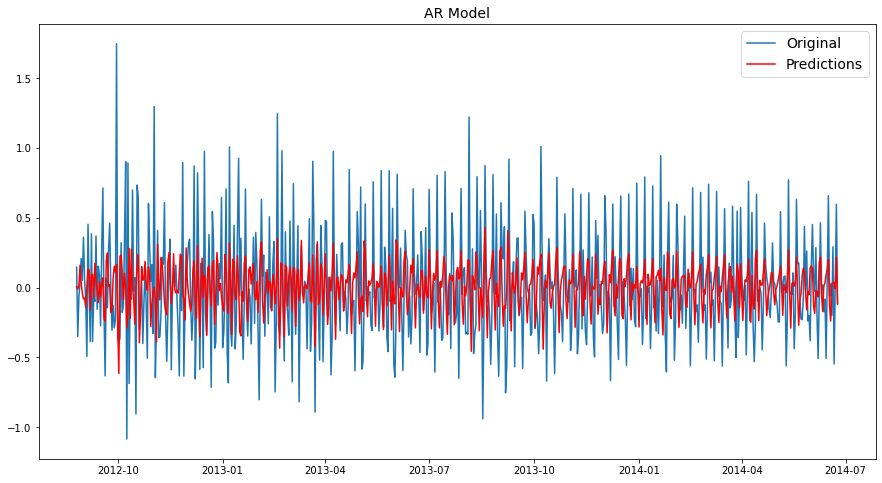

In [38]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_log, order=(2,1,0))  #here the q value is 0 since its just the AR model.
results_AR = model.fit(disp=-1)

plt.plot(trainlog_diff.dropna(),label='Original')
plt.plot(results_AR.fittedvalues,color='red',label='Predictions')
plt.title('AR Model',size=14)
plt.legend(loc='best',fontsize=14)
plt.show()

Now, validation curve for AR model

Changing the model to original scale
First, we store the predicted results as a separate series

In [39]:
#Defining function for predicting validation values.

def valid_predtions(model_result,valid):
    predict_diff = model_result.predict(start='2014-06-25',end='2014-09-25')
    arima_predict_diff = predict_diff.cumsum().shift().fillna(0)
    
    predict_diff1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index= valid.index)
    predict_diff1 = predict_diff1.add(arima_predict_diff,fill_value = 0)
    predict_diff = np.exp(predict_diff1)
    
    plt.plot(valid['Count'],label='Valid')
    plt.plot(predict_diff,color='red',label='Predict')
    plt.legend(loc='best',fontsize=14)
    plt.title('RMSE : %.4f'% (np.sqrt(np.dot(predict_diff,valid['Count']))/valid.shape[0]),size=14)
    plt.show()

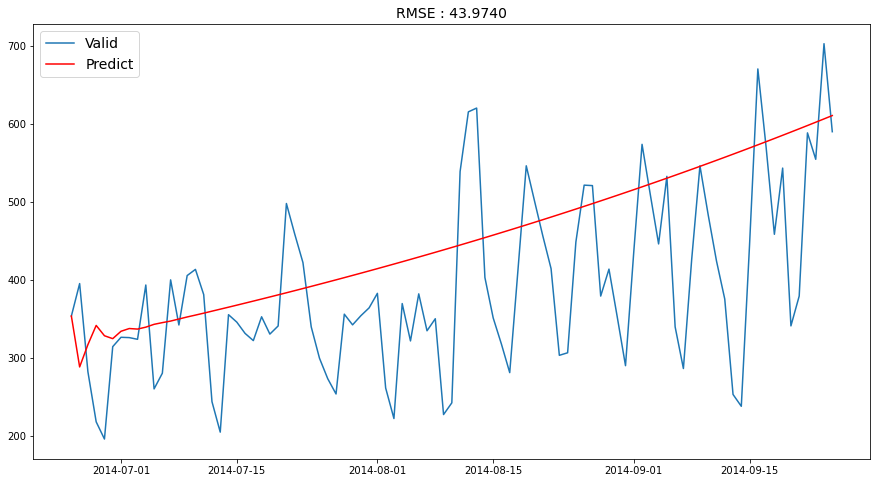

In [40]:
#Predicting values for validation set

valid_predtions(results_AR,Valid)

### MA Model

The MA model specifies that the output variable depends linearly on the current and various past values of stochastic (Imperfectly Predictable) terms.

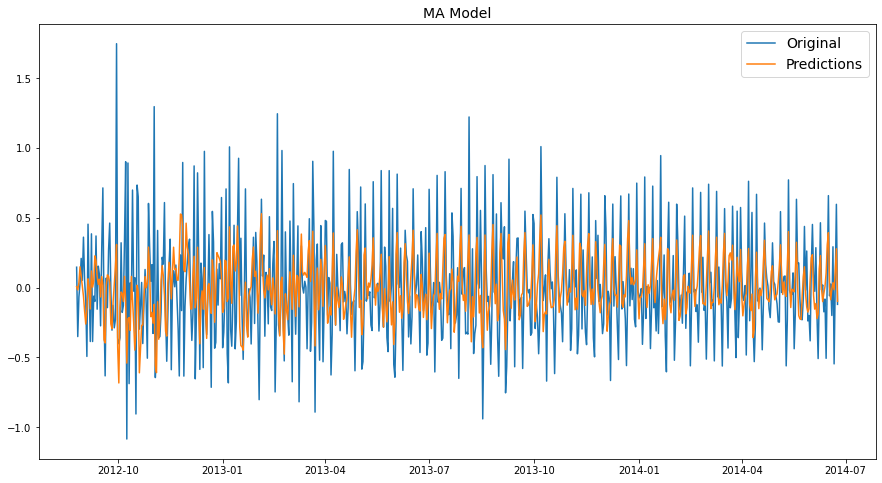

In [41]:
model1 = ARIMA(train_log,order = (0,1,2)) #Here in MA model, p = 0
results_MA = model1.fit(disp=-1)

plt.plot(trainlog_diff.dropna(),label='Original')
plt.plot(results_MA.fittedvalues,label='Predictions')
plt.title('MA Model',size=14)
plt.legend(loc='best',fontsize=14)

plt.show()

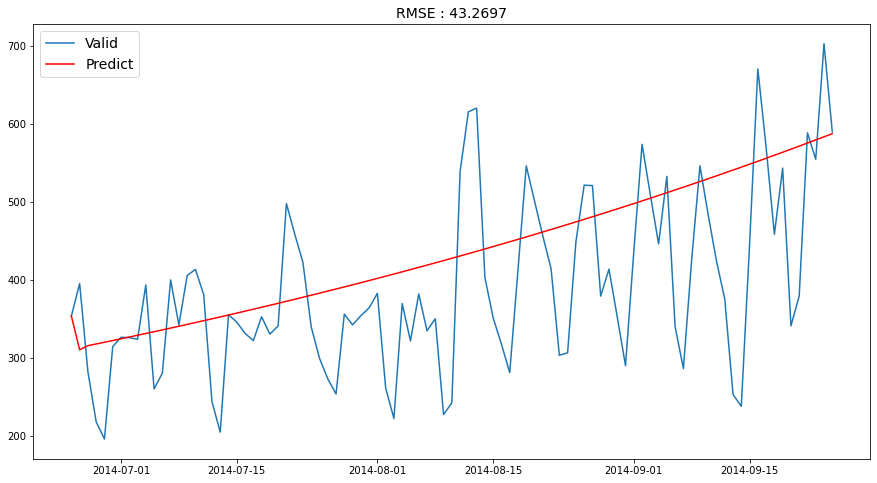

In [42]:
#Predicting values for validation set

valid_predtions(results_MA,Valid)

### Combined Model

/Users/pranaymitra/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


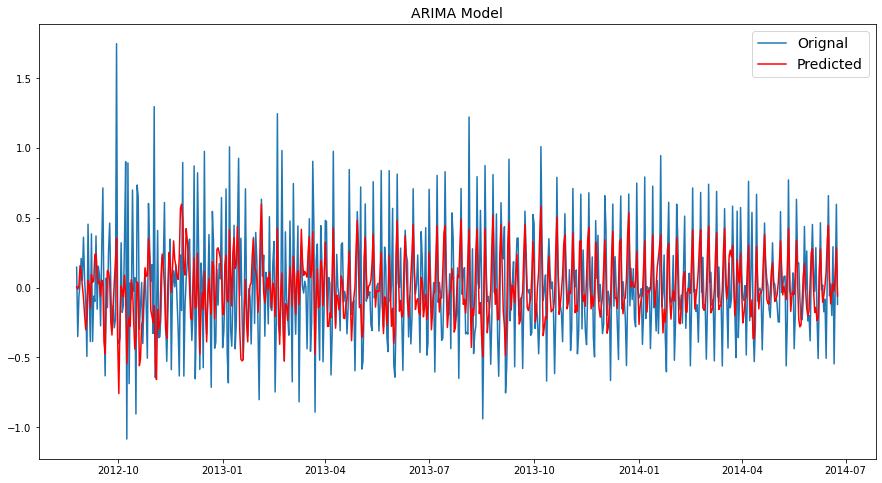

In [43]:
model2 = ARIMA(train_log, order=(2,1,2))
results_ARIMA = model2.fit(disp=-1)

plt.plot(trainlog_diff.dropna(),label= 'Orignal')
plt.plot(results_ARIMA.fittedvalues, color='red' ,label='Predicted')
plt.title('ARIMA Model',size=14)
plt.legend(loc='best',fontsize=14)
plt.show()

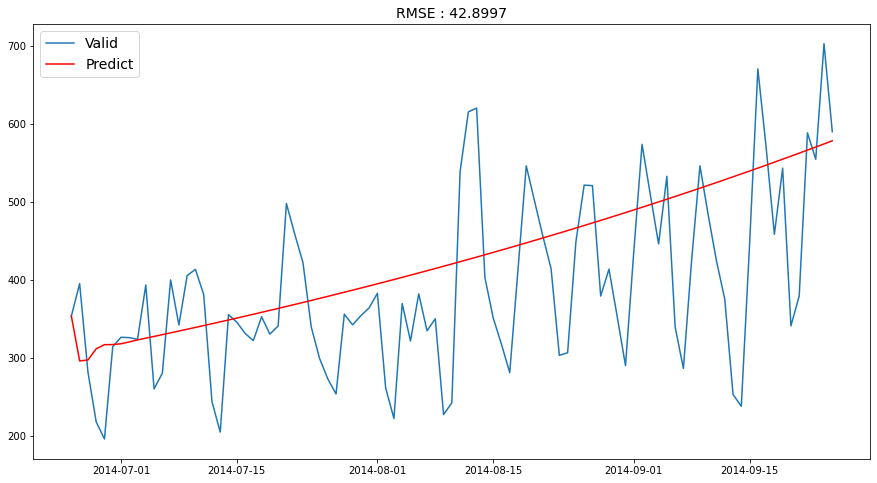

In [44]:
#Predicting values for Validation set
valid_predtions(results_ARIMA,Valid)

## SARIMAX

SARIMAX takes into account the seasonality of the time series.

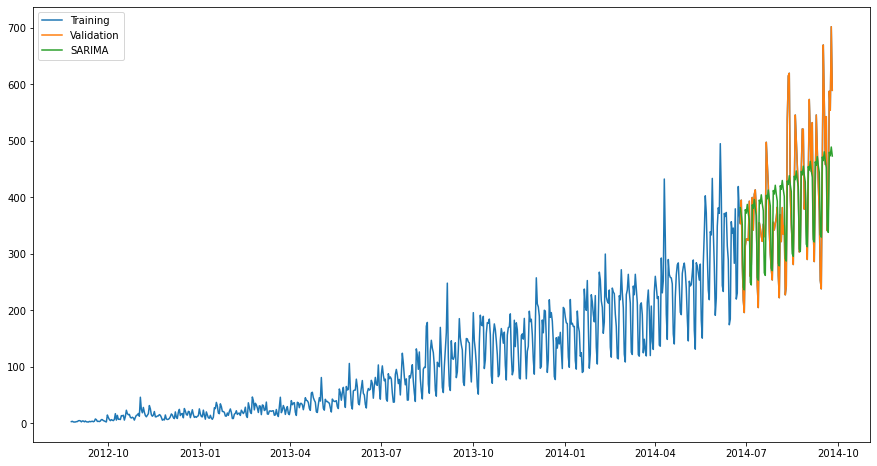

In [45]:
import statsmodels.api as sm

y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-25',end='2014-09-25',dynamic=True)

plt.figure(figsize=(15,8))
plt.plot(train['Count'],label='Training')
plt.plot(Valid['Count'],label='Validation')
plt.plot(y_hat_avg['SARIMA'],label="SARIMA")
plt.legend(loc='best')
plt.show()

Seasonal orders here represent AR parameters, differencing, MA parameters and periodicty. Periodicity = 7 as we are making a model for the daily time series and will repeat after every 7 days.

In [46]:
#rms of validation set
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(Valid.Count,y_hat_avg.SARIMA))
print('The the root mean squared error of the validation set is :',rms)

The the root mean squared error of the validation set is : 68.68860391417388


In [47]:
#These above are daily predictions and we need to convert them into hourly. To do so we take ratio of hourly 
#passenger count from train data and do the same with the predictions.

train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

temp = train_original.groupby(['hour'])['ratio'].sum()
groupBY = pd.DataFrame(temp, columns=['ratio'])
temp2 = groupBY

In [48]:
temp2.reset_index(drop=True,inplace=True)
temp2['Hour'] = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)

In [49]:
#Forecasting time series for period 2014-09-26 to 2015-04-26 from the test set

test_predict = fit1.predict(start = '2014-09-26',end='2015-04-26',dynamic=True)

#These above are daily predictions and we need to convert them into hourly. To do so we take ratio of hourly 
#passenger count from train data and do the same with the predictions.

test['Predictions'] = test_predict

#Merging test and test_original on day, month, year

merged = pd.merge(test,test_original, on = ('day','month','year'),how='left')
merged['Hour'] = merged['hour_y']
merged = merged.drop(['year','month','Datetime','hour_x','hour_y'],axis=1)


prediction = pd.merge(merged,temp2,on='Hour',how='left')

#Converting to original scale
prediction['Count'] = prediction['Predictions']*prediction['ratio']*24

prediction['ID'] = prediction['ID_y']

submission = prediction.drop(['day','Hour','ratio','Predictions','ID_x','ID_y'],axis=1)

In [50]:
submission = submission[['ID','Count']]
submission

,ID,Count
0,18288,558.914722
1,18289,446.043189
2,18290,377.489922
3,18291,311.906437
4,18292,262.532590
...,...,...
5107,23395,998.957073
5108,23396,959.963248
5109,23397,896.024116
5110,23398,899.274779


In [51]:
#pd.DataFrame(submission,columns=['ID','Count']).to_csv('SARIMAX.csv',index=False)

RMSE = 166.7108607449685 at AV

https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/#MySubmissions